In [ ]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt



In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [ ]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [ ]:
engine = create_engine("sqlite:///Data/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Calculate the last data point in the database


last_row = session.query(Measurement).order_by(Measurement.id.desc()).first()
last_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2b23fdcc788>,
 'prcp': 0.45,
 'station': 'USC00516128',
 'date': '2017-08-23',
 'id': 19550,
 'tobs': 76.0}

In [13]:
last_date=last_row.date
last_date

'2017-08-23'

In [14]:
# Calculate the date 1 year ago from the last data point in the database
last_year=int(last_date[0:4])

previous_year=last_year-1
previous_date=str(previous_year)+last_date[4:10]
previous_date

'2016-08-23'

In [15]:
# Perform a query to retrieve the data and precipitation scores
precipitation=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=previous_date).all()
precipitation

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df=pd.DataFrame(precipitation)
precipitation_df.head(5)

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [17]:
#clean the data, delete rows with NaN values
precipitation_df=precipitation_df.dropna(how="any")
precipitation_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [98]:
# Sort the dataframe by date
precipitation_df=precipitation_df.sort_values("date",ascending=True)
precipitation_df=precipitation_df.set_index("date")
precipitation_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


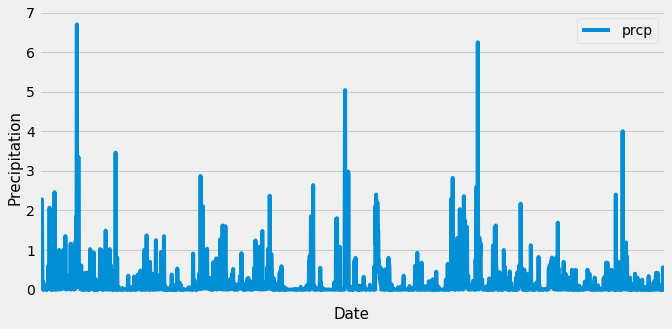

In [102]:
# Use Pandas Plotting with Matplotlib to plot the data

precipitation_df.plot(stacked=False, x_compat=True)

plt.xlabel("Date",fontsize=15)
plt.xticks([])
plt.ylabel("Precipitation",fontsize=15)

plt.savefig('OutputData/Precipitation.png')
plt.show()

![precipitation](Images/precipitation.png)

In [142]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()



,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [104]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Measurement).group_by(Measurement.station).count()
print(f"Number of stations is {stations}")

Number of stations is 9


In [105]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations=session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [106]:
# What are the most active stations? (i.e. what stations have the most rows)?
most_active=stations[0][0]
print(f"The most active station is {most_active}.")

The most active station is USC00519281.


In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

In [107]:
lowest_temp = session.query(Measurement).filter(Measurement.station==most_active).\
order_by(Measurement.tobs.asc()).first()

print(f"The lowest temperature recorded on {most_active} station is {lowest_temp.tobs}F")

The lowest temperature recorded on USC00519281 station is 54.0F


In [108]:
highest_temp = session.query(Measurement).filter(Measurement.station==most_active).\
order_by(Measurement.tobs.desc()).first()

print(f"The highest temperature recorded on {most_active} station is {highest_temp.tobs}F")


The highest temperature recorded on USC00519281 station is 85.0F


In [109]:
sel = [Measurement.station, 
       func.avg(Measurement.tobs)] 
       
avg_temp=session.query(*sel). filter(Measurement.station==most_active).all()
avg_temp

print(f"The average temperature recorded on {most_active} station is {avg_temp[0]}F")


The average temperature recorded on USC00519281 station is ('USC00519281', 71.66378066378067)F


In [110]:
temp=session.query(Measurement.date, Measurement.tobs).filter(Measurement.station==most_active).\
filter(Measurement.date>=previous_date).all()
temp

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [111]:
temp_df=pd.DataFrame(temp)
temp_df.head()

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


In [112]:
months=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
months1=['Jan', 'Feb', "Mar", 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_min=[]
month_max=[]
month_avg=[]



for month in months:
    month_temp=temp_df.loc[temp_df["date"].str.contains('-'+month+'-')]
 
    month_min.append(month_temp["tobs"].min())
    month_max.append(month_temp["tobs"].max())
    month_avg.append(month_temp["tobs"].mean())
  



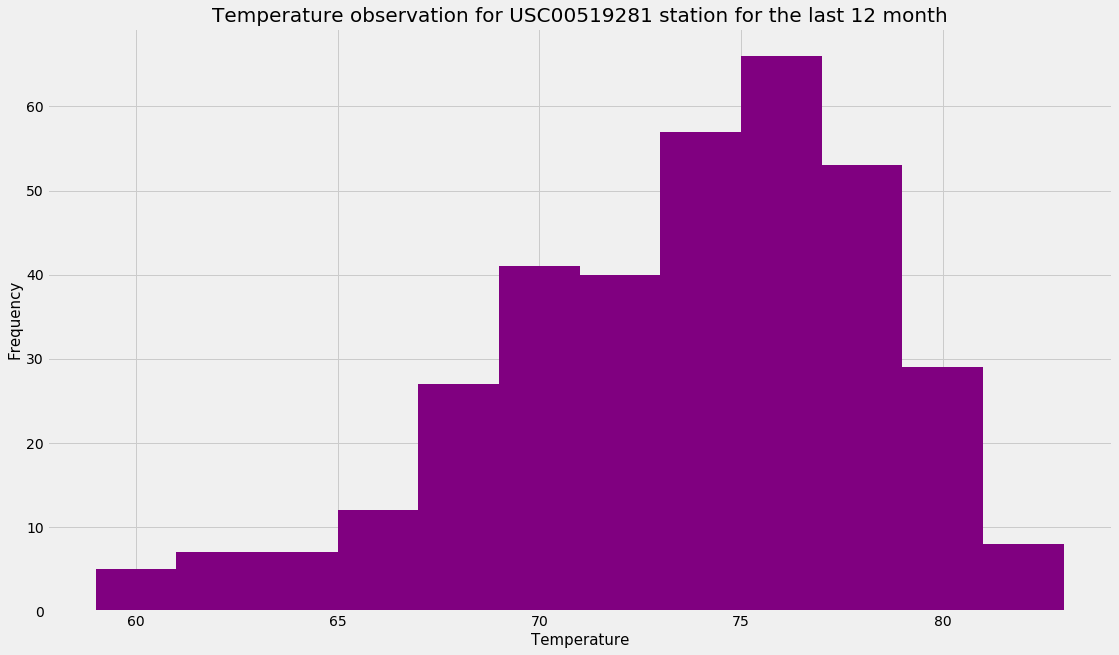

In [113]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
fig=plt.figure(figsize=(17,10))
temp_df['tobs'].plot(kind='hist', bins=12, color="purple")
plt.xlabel("Temperature",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.title(f"Temperature observation for {most_active} station for the last 12 month", fontsize=20)

plt.savefig("OutputData/Station Histogram.png")
plt.show()

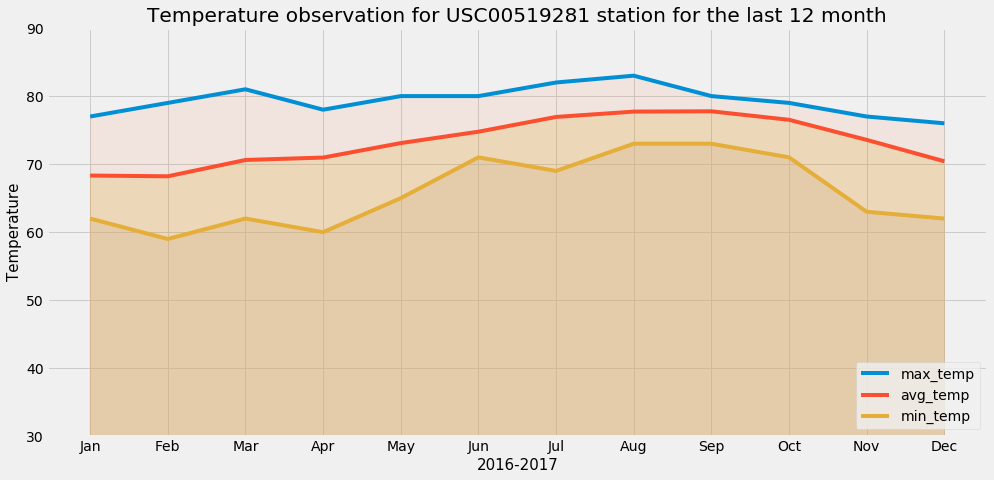

In [115]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

fig=plt.figure(figsize=(15,7))


plt.plot(months1, month_max, label="max_temp"  )
plt.plot(months1, month_avg, label="avg_temp" )
plt.plot(months1, month_min, label="min_temp" )

plt.fill_between(months1,month_max, color='coral',alpha=.1)
plt.fill_between(months1,month_avg, color='goldenrod', alpha=.2)
plt.fill_between(months1,month_min, color='tan', alpha=.3)

plt.xlabel("2016-2017",fontsize=15)
plt.ylabel("Temperature",fontsize=15)
plt.title(f"Temperature observation for {most_active} station for the last 12 month")
plt.legend(loc='lower right')
plt.ylim(30, 90)

plt.savefig("OutputData/Temperature observation for USC00519281 station for the last 12 month.png")
plt.show()

In [116]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))


[(62.0, 69.57142857142857, 74.0)]


In [117]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date='2017-07-15'
end_date='2017-07-25'
print(calc_temps(start_date, end_date ))


[(72.0, 78.57971014492753, 83.0)]


In [118]:
vac_temp=session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.date>=start_date).filter(Measurement.date<=end_date).all()
vac_temp

[('2017-07-15', 80.0),
 ('2017-07-16', 78.0),
 ('2017-07-17', 80.0),
 ('2017-07-18', 80.0),
 ('2017-07-20', 80.0),
 ('2017-07-21', 80.0),
 ('2017-07-22', 81.0),
 ('2017-07-23', 81.0),
 ('2017-07-24', 78.0),
 ('2017-07-25', 80.0),
 ('2017-07-15', 79.0),
 ('2017-07-16', 76.0),
 ('2017-07-17', 75.0),
 ('2017-07-18', 78.0),
 ('2017-07-19', 78.0),
 ('2017-07-20', 78.0),
 ('2017-07-21', 78.0),
 ('2017-07-22', 78.0),
 ('2017-07-23', 75.0),
 ('2017-07-24', 78.0),
 ('2017-07-25', 78.0),
 ('2017-07-15', 82.0),
 ('2017-07-16', 79.0),
 ('2017-07-17', 82.0),
 ('2017-07-18', 82.0),
 ('2017-07-19', 80.0),
 ('2017-07-20', 79.0),
 ('2017-07-21', 79.0),
 ('2017-07-22', 80.0),
 ('2017-07-23', 82.0),
 ('2017-07-24', 79.0),
 ('2017-07-25', 80.0),
 ('2017-07-18', 78.0),
 ('2017-07-19', 81.0),
 ('2017-07-20', 80.0),
 ('2017-07-21', 81.0),
 ('2017-07-25', 81.0),
 ('2017-07-15', 82.0),
 ('2017-07-16', 82.0),
 ('2017-07-17', 82.0),
 ('2017-07-18', 83.0),
 ('2017-07-19', 80.0),
 ('2017-07-20', 80.0),
 ('2017-07-

In [119]:
vacation_df=pd.DataFrame(vac_temp)
vacation_df.head()

,date,tobs
0,2017-07-15,80.0
1,2017-07-16,78.0
2,2017-07-17,80.0
3,2017-07-18,80.0
4,2017-07-20,80.0


In [120]:
dates=['2017-07-15', '2017-07-16', '2017-07-17', '2017-07-18', '2017-07-19', '2017-07-20', '2017-07-21',
        '2017-07-22', '2017-07-13', '2017-07-24', '2017-07-25']

dates_min=[]
dates_max=[]


min_temp=vacation_df["tobs"].min()
print(min_temp)
max_temp=vacation_df["tobs"].max()
print(max_temp)
avg_temp=vacation_df["tobs"].mean()
print(avg_temp)
dif=max_temp-min_temp

for date in dates:
     
    dates_min.append(vacation_df["tobs"]-(vacation_df["tobs"]-min_temp))
    dates_max.append(vacation_df["tobs"]+(max_temp-vacation_df["tobs"]))
    
    #dates_avg.append(date_temp)
#print(dates_min)
#print(dates_max)

72.0
83.0
78.57971014492753


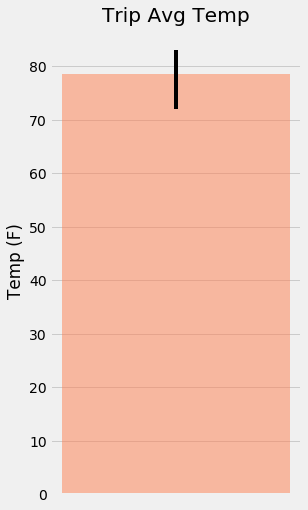

In [121]:
lower_limit = avg_temp - min_temp
upper_limit = max_temp - avg_temp
fig, ax = plt.subplots(figsize=plt.figaspect(2.))
ax.bar(0, avg_temp, yerr=[[lower_limit],[upper_limit]], alpha=0.5, color='coral')
plt.title('Trip Avg Temp')
plt.xticks([])
ax.set_ylabel("Temp (F)")
plt.savefig('OutputData/Trip Avg Temp.png')
plt.show()

In [122]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
stations_prec=session.query(Measurement.station, func.count(Measurement.prcp)).\
filter(Measurement.date>=start_date).filter(Measurement.date<=end_date).\
group_by(Measurement.station).all()
stations_prec

[('USC00513117', 11),
 ('USC00514830', 11),
 ('USC00516128', 11),
 ('USC00517948', 5),
 ('USC00519281', 11),
 ('USC00519397', 10),
 ('USC00519523', 9)]

In [123]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [124]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
stations_prec=session.query(Station.station, Station.name, Station.latitude, 
                            Station.longitude, Station.elevation, func.count(Measurement.prcp)).\
filter(Measurement.station==Station.station).\
filter(Measurement.date>=start_date).filter(Measurement.date<=end_date).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stations_prec

[('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  11),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  11),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  11),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 11),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  9),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 10),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 5)]

## Optional Challenge Assignment

In [125]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
print(daily_normals("01-01"))


[(62.0, 69.15384615384616, 77.0)]


In [136]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date='2017-07-15'
end_date='2017-07-25'

# Use the start and end date to create a range of dates
trip_dates = pd.date_range(start_date, end_date, freq='D')

# Stip off the year and save a list of %m-%d strings
month_day=[]
for date in trip_dates:
    str_date=str(date)
    new_date=str_date[5:10]
    month_day.append(new_date)


# Loop through the list of %m-%d strings and calculate the normals for each date
normals_min=[]
normals_max=[]
normals_avg=[]

for date in month_day:
    
    d_normals_min=session.query(func.min(Measurement.tobs)).\
    filter(func.strftime("%m-%d", Measurement.date) == date).all()
    d_normals_max=session.query(func.max(Measurement.tobs)).\
    filter(func.strftime("%m-%d", Measurement.date) == date).all()
    d_normals_avg=session.query(func.avg(Measurement.tobs)).\
    filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
    normals_min.append(d_normals_min[0][0])
    normals_max.append(d_normals_max[0][0])
    normals_avg.append(d_normals_avg[0][0])
  



In [137]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
tmin_df = pd.DataFrame(normals_min, columns=["tmin"])
tmax_df = pd.DataFrame(normals_max, columns=["tmax"])
tavg_df = pd.DataFrame(normals_avg, columns=["tavg"])
dates = pd.DataFrame(trip_dates, columns=["date"])

trip_df = pd.concat([dates, tmin_df, tavg_df, tmax_df], axis=1)

trip_df.set_index(['date'],inplace=True)
trip_df

,tmin,tavg,tmax
date,,,
2017-07-15,68.0,76.254237,82.0
2017-07-16,70.0,76.344828,83.0
2017-07-17,70.0,76.301887,83.0
2017-07-18,72.0,76.637931,83.0
2017-07-19,68.0,75.890909,83.0
2017-07-20,69.0,75.462963,82.0
2017-07-21,69.0,76.924528,83.0
2017-07-22,69.0,75.788462,81.0
2017-07-23,70.0,76.203704,84.0


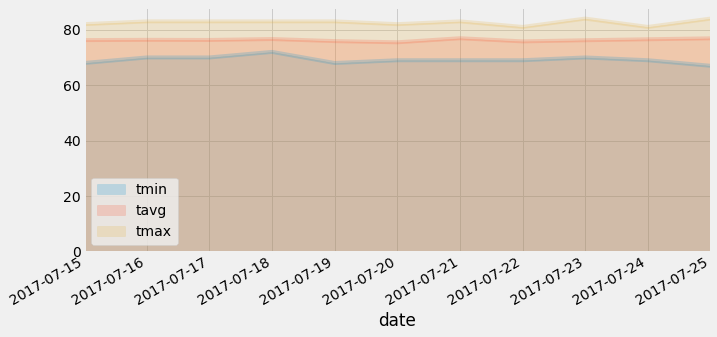

In [135]:
# Plot the daily normals as an area plot with `stacked=False`
trip_df.plot(kind='area', alpha=.2, stacked=False, x_compat=True)

plt.savefig("OutputData/Daily Normals.png")
plt.show()